In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Replace zero values with NaN for specific columns and fill them with the median value
columns_zero_nan = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Replace zero values with NaN and fill with median in one step
data[columns_zero_nan] = data[columns_zero_nan].replace(0, np.NaN).apply(lambda col: col.fillna(col.median()))


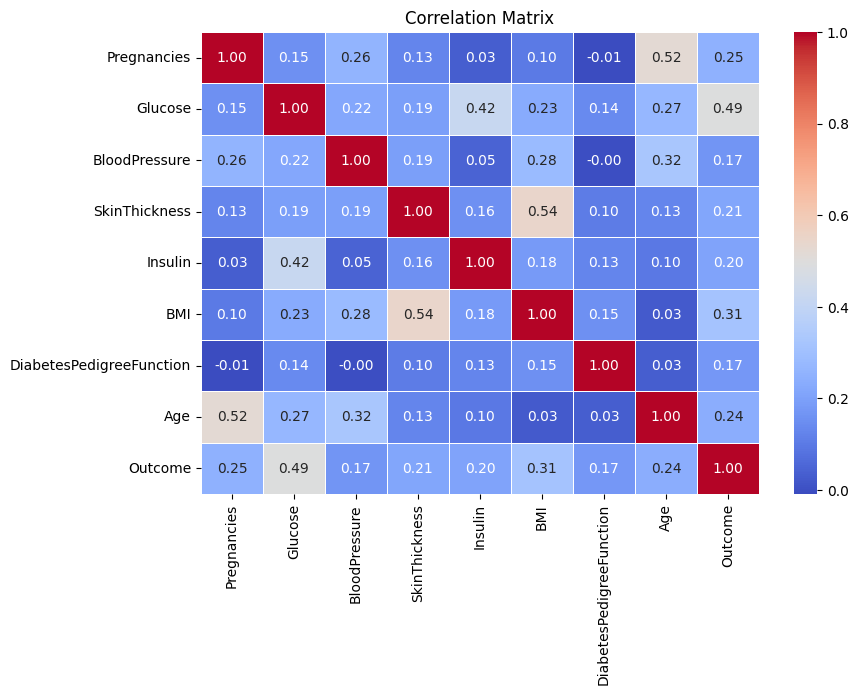

In [23]:
#correlation_matrix tab
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Define a simple step function
def step_function(x):
    return np.where(x >= 0, 1, 0)


In [29]:
# Define the simplified perceptron class
class Perceptron:
    def __init__(self, learningrate=0.01, nepochs=1000, weightinit='random'):
        self.lr = learningrate
        self.nepochs = nepochs
        self.weightinit = weightinit
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        samples, features = X.shape
        # Initialize weights and bias
        if self.weightinit == 'random':
            self.weights = np.random.rand(features)
        else:
            self.weights = np.zeros(features)
        self.bias = 0
        
        # Training using gradient descent
        for _ in range(self.nepochs):
            for idx, x_i in enumerate(X):
                linearop = np.dot(x_i, self.weights) + self.bias
                y_pred = step_function(linearop)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linearop = np.dot(X, self.weights) + self.bias
        return step_function(linearop)


In [30]:
# Prepare the data for training
X = data.drop(columns='Outcome').values
y = data['Outcome'].values

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [31]:
# Split the dataset manually
splitratio = 0.8
splitindex = int(len(X) * splitratio)
X_train, X_test = X[:splitindex], X[splitindex:]
y_train, y_test = y[:splitindex], y[splitindex:]


In [32]:
# Train the simplified perceptron model
learningrate = 0.01# Change the learning rate here
nepochs= 1000
perceptron = Perceptron(learningrate=learningrate, nepochs=nepochs, weightinit='random')
perceptron.fit(X_train, y_train)

# Predictions
y_pred = perceptron.predict(X_test)
print('split ratio is', splitratio)
print('learning rate', learningrate)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=0))


split ratio is 0.8
learning rate 0.01
Accuracy: 0.7857
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [34]:
from sklearn.linear_model import Perceptron as SklearnPerceptron
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500, 2000, 2500, 3000, 3500]
results = []
results_sklearns = []

for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Training with learning rate: {lr}, epochs: {epochs}")
        
        # Train the simplified perceptron model
        perceptron = Perceptron(learningrate=lr, nepochs=epochs, weightinit='random')
        perceptron.fit(X_train, y_train)

        # Predictions
        y_pred = perceptron.predict(X_test)
        # Calculate accuracy
        accuracy_ = np.mean(y_pred == y_test)
        print(f'Accuracy: {accuracy:.4f}')
        # Print classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        # Train the sklearn Perceptron model
        print(f"Training sklearn perceptron with learning rate: {lr}, epochs: {epochs}")
        
        perceptron_sklearn = SklearnPerceptron(max_iter=epochs, eta0=lr, random_state=42)
        perceptron_sklearn.fit(X_train, y_train)

        # Predictions for sklearn perceptron
        y_pred_sklearn = perceptron_sklearn.predict(X_test)

        # Calculate accuracy for sklearn perceptron
        accuracy_sklearn = np.mean(y_pred_sklearn == y_test)
        print(f'Sklearn Perceptron Accuracy: {accuracy_sklearn:.4f}')
        
        # Print classification report for sklearn perceptron
        print("Sklearn Perceptron Classification Report:")
        print(classification_report(y_test, y_pred_sklearn, zero_division=0))
        #Results
        results.append((lr, epochs, accuracy))
        results_sklearns.append((lr, epochs, accuracy_sklearn))
        

Training with learning rate: 0.01, epochs: 500
Accuracy: 0.7857
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

Training sklearn perceptron with learning rate: 0.01, epochs: 500
Sklearn Perceptron Accuracy: 0.7532
Sklearn Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Training with learning rate: 0.01, epochs: 1000
Accuracy: 0.7857
Classification Report:
              precision    

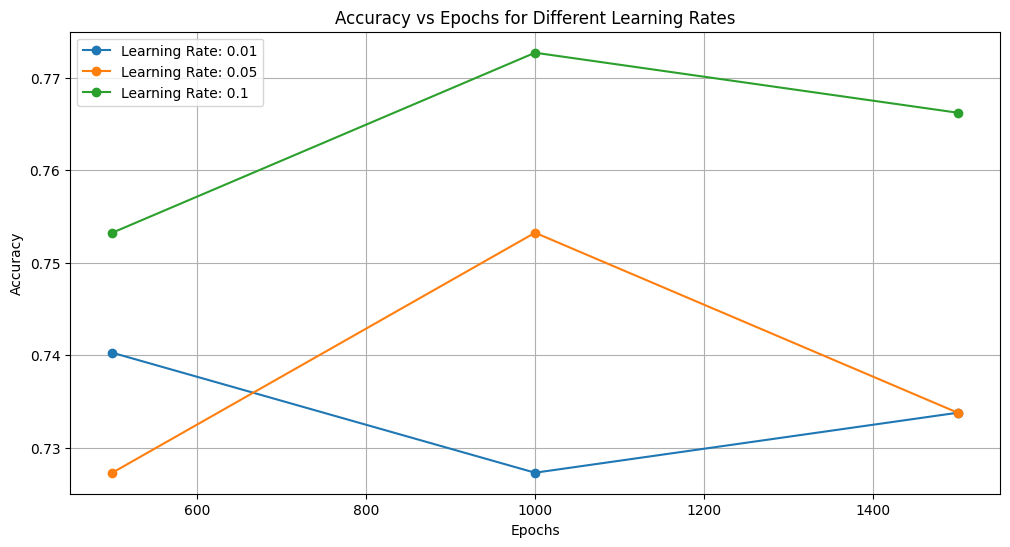

In [12]:
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    accuracies = [result[2] for result in results if result[0] == lr]
    plt.plot(epochs_list, accuracies, marker='o', label=f'Learning Rate: {lr}')

plt.title('Accuracy vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

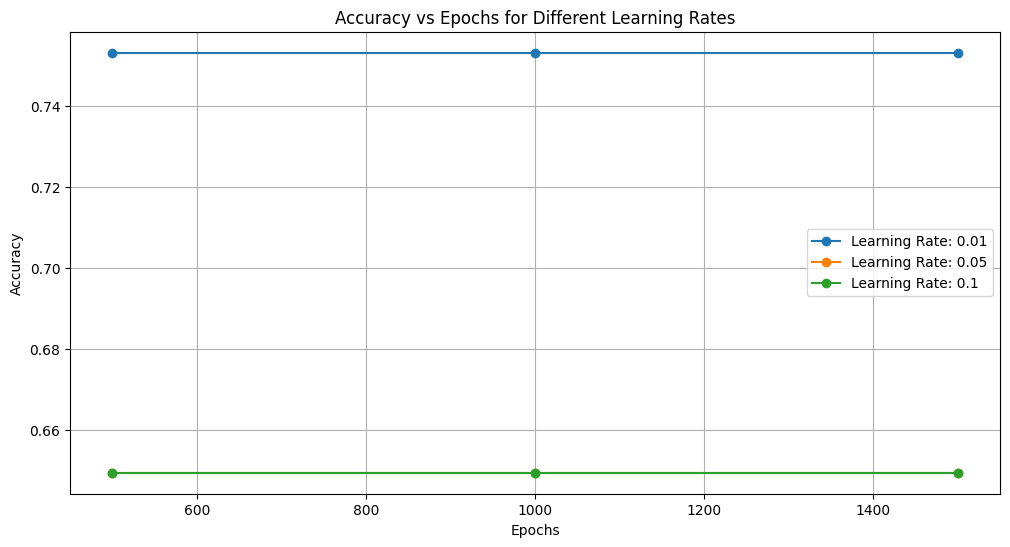

In [13]:
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    # Extract accuracies for the current learning rate
    accuracies = [results_sklearn[2] for results_sklearn in results_sklearns if results_sklearn[0] == lr]
    
    # Check if the number of accuracies matches the number of epochs
    if len(accuracies) == len(epochs_list):
        plt.plot(epochs_list, accuracies, marker='o', label=f'Learning Rate: {lr}')
    

plt.title('Accuracy vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
split_ratio2 = 0.7
split_index2 = int(len(X) * split_ratio2)
X_train2, X_test2 = X[:split_index2], X[split_index2:]
y_train2, y_test2 = y[:split_index2], y[split_index2:]


In [37]:
from sklearn.linear_model import Perceptron as SklearnPerceptron
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500, 2000, 2500, 3000, 3500]
results = []
results_sklearn = []

for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Training with learning rate: {lr}, epochs: {epochs}")
        
        # Train the simplified perceptron model
        perceptron = Perceptron(learningrate=lr, nepochs=epochs, weightinit='random')
        perceptron.fit(X_train2, y_train2)

        # Predictions
        y_pred = perceptron.predict(X_test2)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_test2)
        print(f'Accuracy: {accuracy:.4f}')
        
        # Print classification report
        print("Classification Report:")
        print(classification_report(y_test2, y_pred, zero_division=0))
        
        results.append((lr, epochs, accuracy))
                # Train the sklearn Perceptron model
        print(f"Training sklearn perceptron with learning rate: {lr}, epochs: {epochs}")
        
        perceptron_sklearn = SklearnPerceptron(max_iter=epochs, eta0=lr, random_state=42)
        perceptron_sklearn.fit(X_train2, y_train2)

        # Predictions for sklearn perceptron
        y_pred_sklearn = perceptron_sklearn.predict(X_test2)

        # Calculate accuracy for sklearn perceptron
        accuracy_sklearn = np.mean(y_pred_sklearn == y_test2)
        print(f'Sklearn Perceptron Accuracy: {accuracy_sklearn:.4f}')
        
        # Print classification report for sklearn perceptron
        print("Sklearn Perceptron Classification Report:")
        print(classification_report(y_test2, y_pred_sklearn, zero_division=0))

Training with learning rate: 0.01, epochs: 500
Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       152
           1       0.68      0.61      0.64        79

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231

Training sklearn perceptron with learning rate: 0.01, epochs: 500
Sklearn Perceptron Accuracy: 0.7706
Sklearn Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       152
           1       0.64      0.73      0.69        79

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231

Training with learning rate: 0.01, epochs: 1000
Accuracy: 0.7446
Classification Report:
              precision    